In [1]:
#import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("heart.csv")
type(dataset)

pandas.core.frame.DataFrame

In [3]:
dataset.shape

(303, 14)

In [4]:
#Remove NA/Null values

dataset.dropna(axis = 0, inplace = True) 
print(dataset.shape)

(303, 14)


In [5]:
#Drop duplicate values

data_dup = dataset.duplicated().any()
data_dup

True

In [6]:
dataset = dataset.drop_duplicates()
data_dup = dataset.duplicated().any()
data_dup

False

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [9]:
#Each column possible values
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
        "resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)",
        " maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest",
        "the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
#understanding the target attribute
dataset["target"].describe()

count    302.000000
mean       0.543046
std        0.498970
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()

array([1, 0], dtype=int64)

In [12]:
# finding correlation between target and other attributes
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.435601
cp          0.432080
oldpeak     0.429146
thalach     0.419955
ca          0.408992
slope       0.343940
thal        0.343101
sex         0.283609
age         0.221476
trestbps    0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
Name: target, dtype: float64


target
0    138
1    164
Name: count, dtype: int64


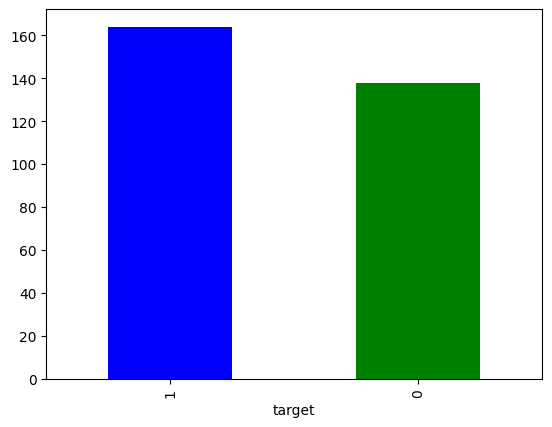

In [13]:
#analysing the target attribute
df=dataset['target']

df.value_counts().plot(kind="bar",color=['blue','green'])
target_temp = dataset.target.value_counts(ascending=True)

print(target_temp)
plt.show()

In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.13


In [15]:
#analyze the 'sex' attribute
dataset["sex"].unique()

array([1, 0], dtype=int64)

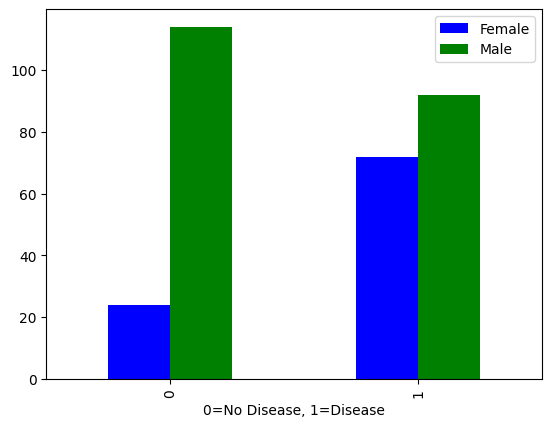

In [16]:

pd.crosstab(dataset.target,dataset.sex).plot(kind="bar",color=['blue','green'])
plt.xlabel("0=No Disease, 1=Disease")
plt.legend(["Female", "Male"])

In [17]:
#we notice that females have more chances of having heart problems

In [18]:
#analyze the 'chest pain(cp)' attribute
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

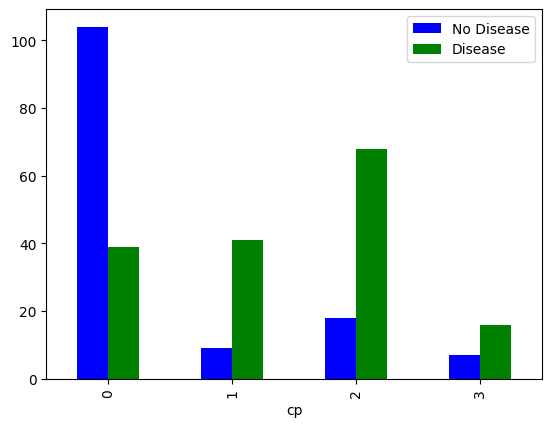

In [19]:

pd.crosstab(dataset.cp,dataset.target).plot(kind="bar",color=['blue','green'])
plt.legend(["No Disease", "Disease"])

In [20]:
#we can say that people with chest pain of '0'

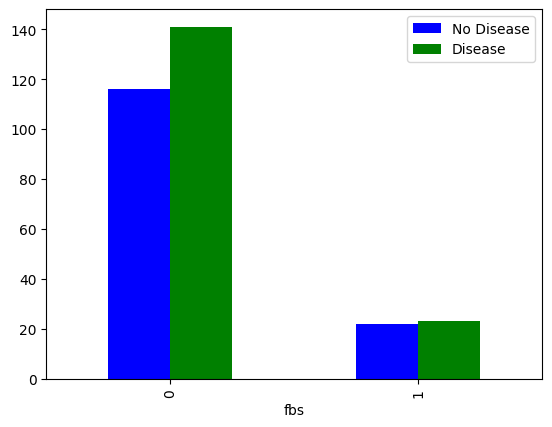

In [21]:
#analyze 'fbs' feature
pd.crosstab(dataset.fbs,dataset.target).plot(kind="bar",color=['blue','green'])
plt.legend(["No Disease", "Disease"])

In [22]:
#we can see that 'fbs' feature is not that informative

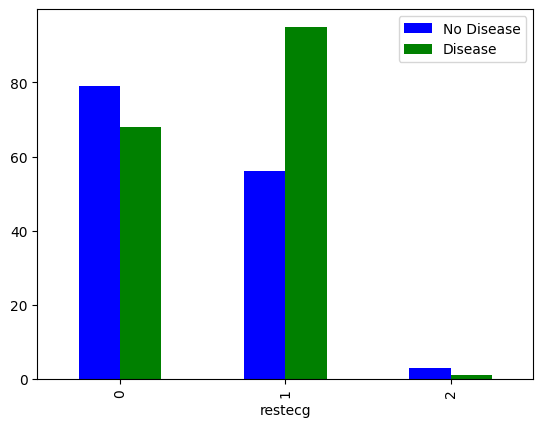

In [23]:
#analyze the 'restecg' feature
pd.crosstab(dataset.restecg,dataset.target).plot(kind="bar",color=['blue','green'])
plt.legend(["No Disease", "Disease"])

In [24]:
#we can say people with restecg of '0' and '1' have more chances of getting heart disease

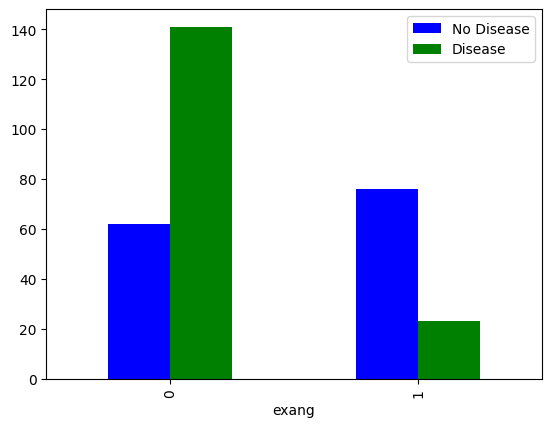

In [25]:
#analyze 'exang' feature
pd.crosstab(dataset.exang,dataset.target).plot(kind="bar",color=['blue','green'])
plt.legend(["No Disease", "Disease"])

In [26]:
#people with exang '1' are less likely to have heart disease

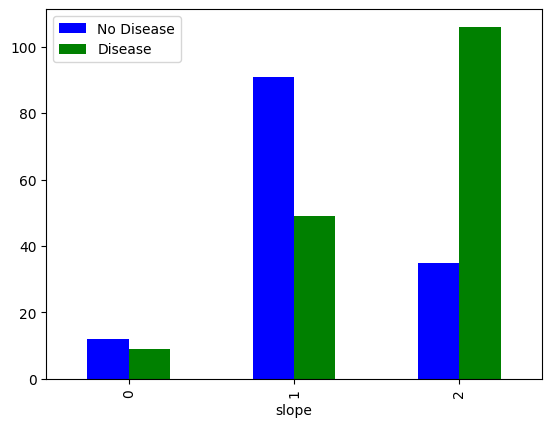

In [27]:
#analyze 'slope' feature
pd.crosstab(dataset.slope,dataset.target).plot(kind="bar",color=['blue','green'])
plt.legend(["No Disease", "Disease"])

In [28]:
#we observe slope '2' causes more heart pain

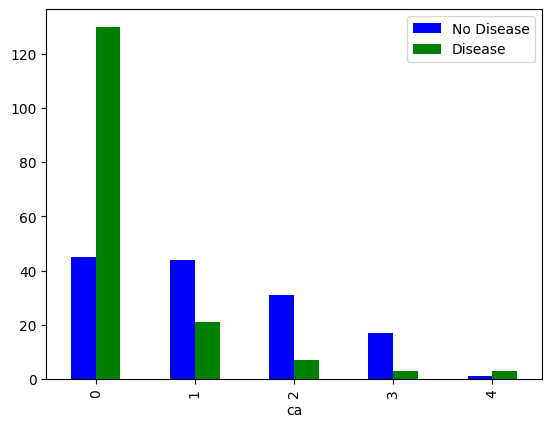

In [29]:
#analyze 'ca' feature
pd.crosstab(dataset.ca,dataset.target).plot(kind="bar",color=['blue','green'])
plt.legend(["No Disease", "Disease"])

In [30]:
#we observe ca '0' and '4' more heart patients

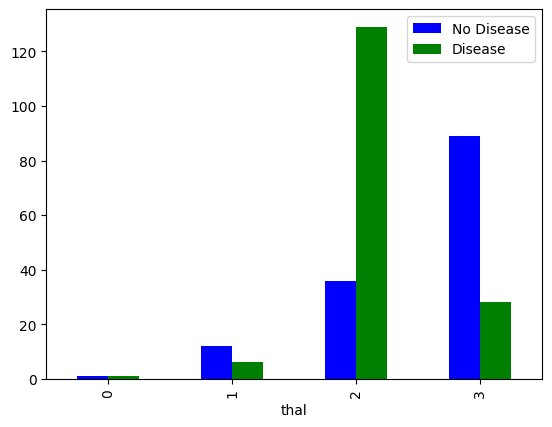

In [31]:
#analyze 'thal' feature
pd.crosstab(dataset.thal,dataset.target).plot(kind="bar",color=['blue','green'])
plt.legend(["No Disease", "Disease"])

In [32]:
#divide dataset into Train and test data



In [33]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
X_train.shape

(241, 13)

In [34]:
X_test.shape

(61, 13)

In [35]:
Y_train.shape

(241,)

In [36]:
Y_test.shape

(61,)

In [37]:
#fitting the data

from sklearn.metrics import accuracy_score

In [38]:
#logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [39]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [40]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

In [41]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 90.16 %


In [42]:
#SVM(support vector machine)

from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)

In [43]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 86.89 %


In [44]:
#K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [45]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 62.3 %


In [46]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [47]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 78.69 %


In [48]:
#Random forest

from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [49]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


In [50]:
#Final Output

scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 90.16 %
The accuracy score achieved using Support Vector Machine is: 86.89 %
The accuracy score achieved using K-Nearest Neighbors is: 62.3 %
The accuracy score achieved using Decision Tree is: 78.69 %
The accuracy score achieved using Random Forest is: 90.16 %


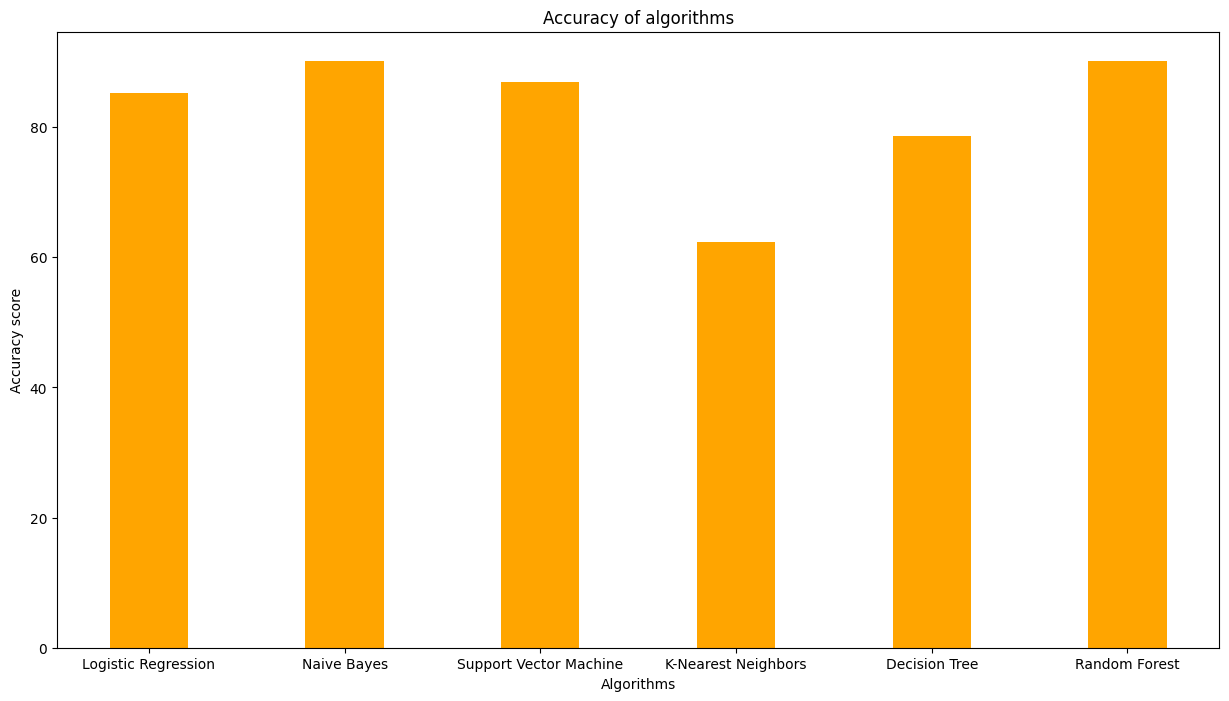

In [51]:

fig = plt.figure(figsize = (15, 8))
plt.bar(algorithms,scores,color='orange',width=0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title("Accuracy of algorithms")
plt.show()

In [52]:
#Ensembling
#Combining the models

from mlxtend.classifier import StackingCVClassifier

In [69]:
scv = StackingCVClassifier(classifiers=[knn,nb,dt,sv,rf],meta_classifier=lr)

scv.fit(X_train,Y_train)

StackingCVClassifier(classifiers=[KNeighborsClassifier(n_neighbors=7),
                                  GaussianNB(),
                                  DecisionTreeClassifier(random_state=0),
                                  SVC(kernel='linear'),
                                  RandomForestClassifier(random_state=23)],
                     meta_classifier=LogisticRegression())

In [70]:
Y_pred_ens = scv.predict(X_test)

In [71]:
accuracy_score(Y_test,Y_pred_ens)

0.8852459016393442

In [72]:
#Give new data to predict

new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [73]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [74]:
p = scv.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [75]:
#Save the module

import pickle

In [76]:
filename="trained_model.sav"
pickle.dump(scv, open(filename,'wb'))

In [77]:
#loading saved model
loaded_model=pickle.load(open("trained_model.sav",'rb'))

In [78]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,0)

    #changing the input data to numpy array

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped =input_data_as_numpy_array.reshape(1,-1)

    # reshape the array as we are predicting for one instance input_data_reshaped input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):

         print( " no heart disease")
else:

        print( "heart disease")

[1]
heart disease
